In [3]:
import pandas as pd
import numpy as np
import scipy.stats

In [4]:
#ALL 2002~2012년데이터
df_2002 = pd.read_excel("../데이터자료/ALL(IRS,CRS,Basis,KTB)_2002.xlsx")
df = pd.read_excel("../데이터자료/join_data.xlsx")
# 원래데이터의 필요한것만 가져오기
df_2012=df[['DateTime', '종가_ex','1Y_Mid_irs','2Y_Mid_irs','3Y_Mid_irs','5Y_Mid_irs','10Y_Mid_irs',
 '1Y_Mid_crs','2Y_Mid_crs','3Y_Mid_crs','5Y_Mid_crs','10Y_Mid_crs', 
 '국고1년','국고3년','국고5년','국고10년','통안364일','통안2년', 
 '1Y_베이시스', '2Y_베이시스', '3Y_베이시스', '5Y_베이시스','10Y_베이시스','Mid_ndf', 'M1_스왑포인트']]

# 2012년도 데이터와의 결합을 위한 컬럼명 통일
df_2002.columns=['DateTime','국고1년','국고3년','국고5년','국고10년','통안364일','통안2년',
                  '1Y_Mid_irs','2Y_Mid_irs','3Y_Mid_irs','5Y_Mid_irs','10Y_Mid_irs',
                   '1Y_Mid_crs','2Y_Mid_crs','3Y_Mid_crs','5Y_Mid_crs','10Y_Mid_crs',
                   '1Y_베이시스', '2Y_베이시스', '3Y_베이시스', '5Y_베이시스','10Y_베이시스']

df_all= pd.concat([df_2002,df_2012]).reset_index(drop='index')

In [5]:
#시간데이터 일치화
df_all["DateTime"] = pd.to_datetime(df_all["DateTime"], format="%Y-%m-%d")
df_all["DateTime"] = df_all["DateTime"].dt.strftime('%Y-%m-%d')


In [6]:
df_all = df_all.set_index(df_all['DateTime'])
df_all = df_all.drop(columns='DateTime')
df_all.head()

,국고1년,국고3년,국고5년,국고10년,통안364일,통안2년,1Y_Mid_irs,2Y_Mid_irs,3Y_Mid_irs,5Y_Mid_irs,...,5Y_Mid_crs,10Y_Mid_crs,1Y_베이시스,2Y_베이시스,3Y_베이시스,5Y_베이시스,10Y_베이시스,종가_ex,Mid_ndf,M1_스왑포인트
DateTime,,,,,,,,,,,,,,,,,,,,,
2002-08-01,5.07,5.30,5.48,5.91,6.49,4.73,4.90,5.08,5.51,6.10,...,-39.0,5.16,5.48,5.97,NaN,5.16,5.50,NaN,NaN,NaN
2002-08-02,5.02,5.22,5.41,5.86,6.42,4.67,4.82,5.01,5.47,6.02,...,-40.0,5.09,5.39,5.89,NaN,5.09,5.41,NaN,NaN,NaN
2002-08-05,4.90,5.09,5.27,5.71,6.27,4.54,4.69,4.88,5.32,5.87,...,-40.0,5.00,5.26,5.68,NaN,5.00,5.27,NaN,NaN,NaN
2002-08-06,4.97,5.17,5.36,5.78,6.34,4.64,4.78,4.97,5.38,5.94,...,-40.0,5.05,5.32,5.73,NaN,5.05,5.32,NaN,NaN,NaN
2002-08-07,4.93,5.16,5.34,5.74,6.28,4.60,4.77,4.95,5.35,5.89,...,-39.0,5.03,5.30,5.68,NaN,5.03,5.32,NaN,NaN,NaN


In [7]:
# # 전월대비 이자율 변화로 할 때 계산
# df_all_return = df_all - df_all.shift(1)
# # 전월대비 수익률 변화로 할 때
# # df_all_return = df_all.pct_change()
# # df_all_return = pd.DataFrame(df_all_return) * 100
# df_all_return = df_all_return.dropna()

In [8]:
df_all_return=df_all
df_all_return = df_all_return.dropna()

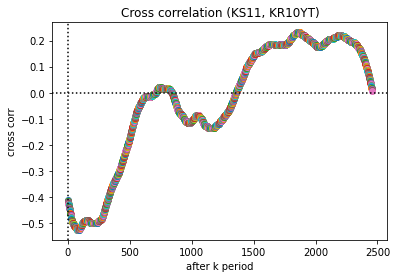

In [9]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['국고1년'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
    # print(f'국고1년채와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

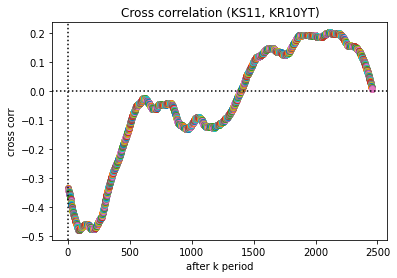

In [10]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['국고3년'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
    # print(f'국고3년채와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()


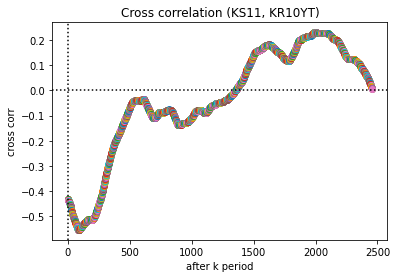

In [11]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['국고5년'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
   # print(f'국고5년채와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

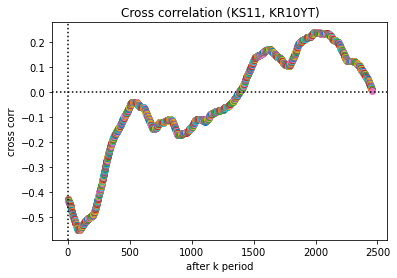

In [12]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['국고10년'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
   # print(f'국고10년채와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

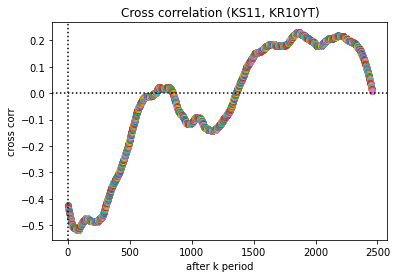

In [13]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['통안364일'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
   # print(f'통안364일채와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

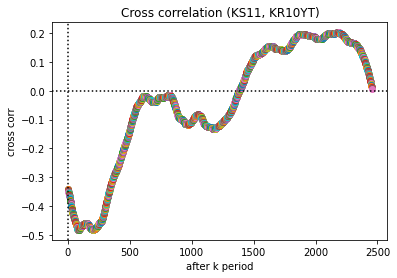

In [14]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['통안2년'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
    # print(f'툥안2년채와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')
    
for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

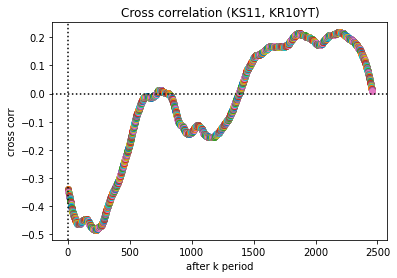

In [15]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['1Y_Mid_irs'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
    # print(f'1년 irs와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

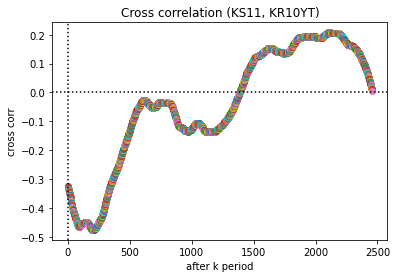

In [16]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['2Y_Mid_irs'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
    # print(f'2년 irs와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

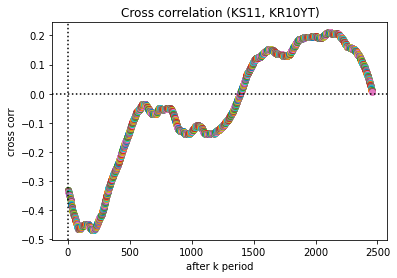

In [17]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['3Y_Mid_irs'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
    # print(f'3년 irs와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

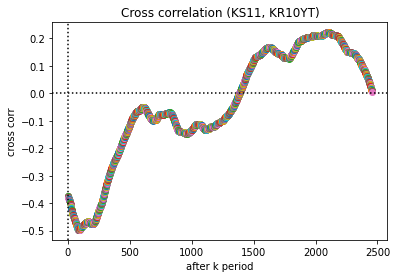

In [18]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['5Y_Mid_irs'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
   # print(f'5년 irs와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

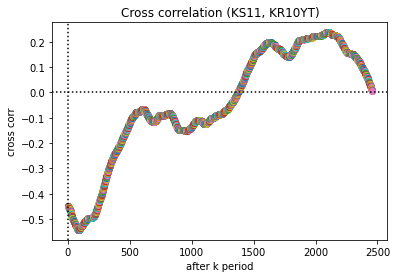

In [19]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['10Y_Mid_irs'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
   # print(f'10년 irs와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

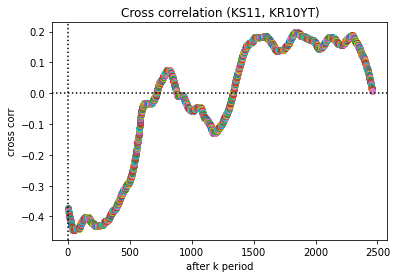

In [20]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['1Y_Mid_crs'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
   # print(f'1년 crs와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

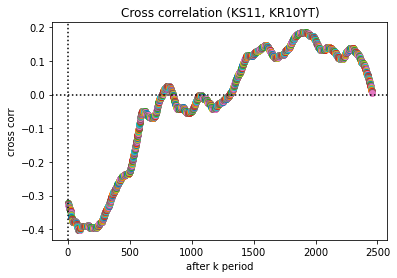

In [21]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['2Y_Mid_crs'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
   # print(f'2년 crs와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

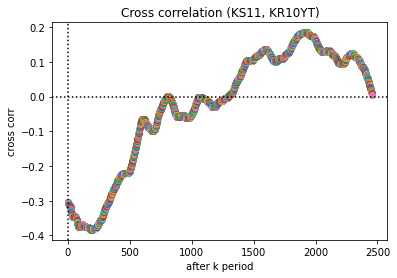

In [22]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['3Y_Mid_crs'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
    # print(f'3년 crs와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

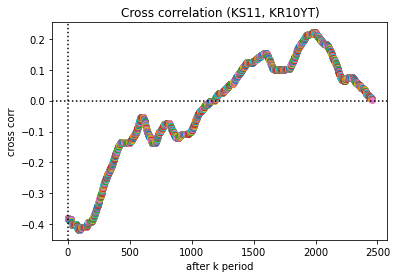

In [23]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['5Y_Mid_crs'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
    # print(f'5년 crs와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()


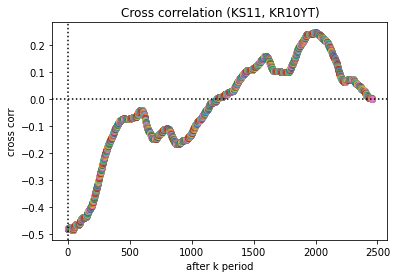

In [24]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['10Y_Mid_crs'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
    # print(f'10년 crs와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()

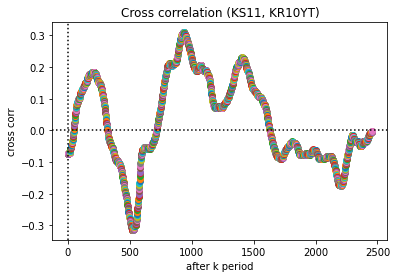

In [25]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['1Y_베이시스'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
   # print(f'1년 베이시스와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()


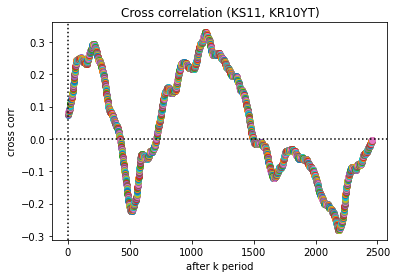

In [26]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['2Y_베이시스'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
    # print(f'1년 베이시스와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()


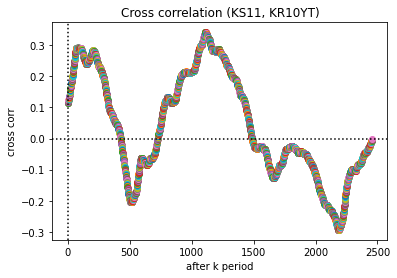

In [27]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['3Y_베이시스'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
    # print(f'1년 베이시스와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()


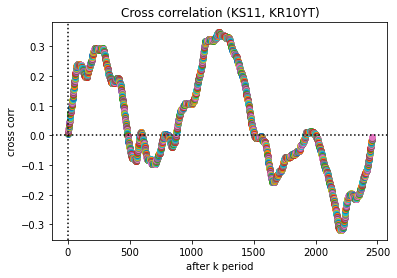

In [28]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['5Y_베이시스'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
    # print(f'1년 베이시스와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()


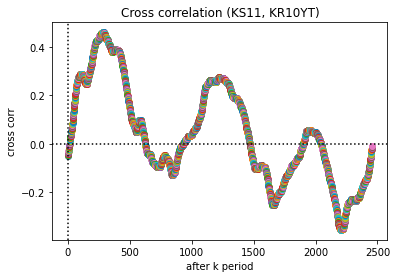

In [29]:
# 나중에 환율 데이터를 더 가지고 오면 이상의 상관성도 볼 수 있음
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

rate_data = np.array(df_all_return['10Y_베이시스'])
exchange_data = np.array(df_all_return['종가_ex'])


cc = sm.tsa.stattools.ccf(exchange_data, rate_data, adjusted=False, fft=True)
#상관계수값 확인하고 싶으면 주석 풀기
# for i in range(2457):
    # print(f'1년 베이시스와 환율과의 {i}일 후 상관계수 값 : {cc[i] : .5f}')

for i in range(2457):
    plt.scatter(i, cc[i])
plt.axvline(x=0, color='k' ,linestyle = ':') 
plt.axhline(y=0, color='k' ,linestyle = ':')
plt.title('Cross correlation (KS11, KR10YT)')
plt.xlabel('after k period')
plt.ylabel('cross corr')
plt.show()
